C:\Users\sekhavati\AppData\Local\Temp\ipykernel_14448\2493617806.py:12: RuntimeWarning: overflow encountered in exp
  return a1*(1-np.exp(-b1*x))+a2*(1-np.exp(-b2*x))


the calculated half lives are : [ 12.38666478 166.74277537]


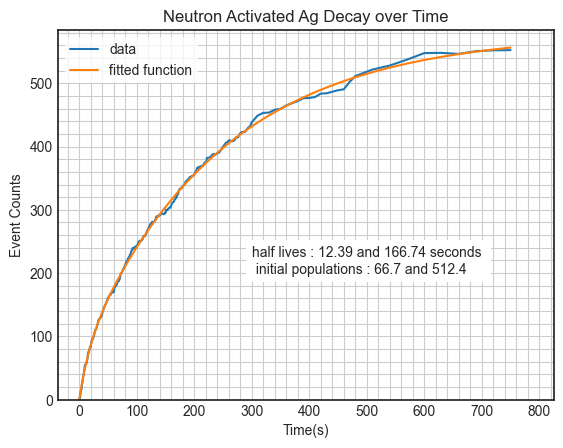

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt('exp9_data.csv',delimiter=',')

times = data[:,0]
background = (602/(22*60+2))*times
counts = data[:,1]-background

def fitfunc(x,a1,b1,a2,b2):
    return a1*(1-np.exp(-b1*x))+a2*(1-np.exp(-b2*x))

params, cov = curve_fit(fitfunc,times,counts)

half_lives = np.log(2)/(params[[1,3]])
pops = params[[0,2]]

print('the calculated half lives are :',half_lives)

plt.style.use(plt.style.available[25])
plt.plot(times,counts,label=r'data')
plt.plot(times,fitfunc(times,*params),label=r"fitted function")
plt.title(r'Neutron Activated Ag Decay over Time')
plt.xlabel(r'Time(s)')
plt.ylabel(r'Event Counts')
plt.text(300,200,f'half lives : {half_lives[0]:.2f} and {half_lives[1]:.2f} seconds \n initial populations : {pops[0]:.1f} and {pops[1]:.1f}',
         bbox={'facecolor':'white','ec':'none'})
plt.ylim(bottom=0)
plt.xlim(right=1.1*times.max())
plt.minorticks_on()
plt.grid(True,which='both')
lg = plt.legend(frameon=True)
lg.get_frame().set_linewidth(0.0)
plt.savefig('exp9_plot.jpg',dpi=500)
plt.show()

In [21]:
times = np.append(np.arange(0,30,0.5),
                  np.append(np.arange(30,222,1),
                            np.append(np.arange(222,300,3),
                                      np.append(np.arange(300,480,10),np.arange(480,780,30)))))

data = np.genfromtxt('exp9_data_draft.csv')
tot = np.zeros([306,2])

for i in range(306):
    tot[i,0]=times[i]
    tot[i,1]=data[i]

np.savetxt('exp9_data.csv',tot,fmt='%.1f',delimiter=',')